# CEE 690-02

# Environmental Spatial Data Analysis

# Lecture 19

# Logistics

* Pushed the due date of HW#7 to Thursday, 11/14.
* HW#8 will be due on 11/26 (that can't be pushed back). 

# Per request: Opendap and all of its variants

You can directly subset a data without downloading the entire method this way. Just google it, and you should be able to figure it out. There are many examples out there. 

Here is the address for GPM's opendap server:

https://gpm1.gesdisc.eosdis.nasa.gov/opendap/GPM_L3/GPM_3IMERGHH.06/contents.html

There are lots of ways to do this. Here are a few examples. 

# Example 1: Opendap with xarray

Go [here](http://xarray.pydata.org/en/stable/io.html) for more info.

In [ ]:
import xarray as xr
fp = xr.open_dataset('https://nomads.ncep.noaa.gov:9090/dods/hrrr/hrrr20191104/hrrr_sfc.t00z')

In [ ]:
print(fp)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
#Plot the temperature for the first time step of the simulation
fp['tmp2m'][0,:,:].plot()
plt.show()

In [ ]:
#We could also subset a single variable for the area that we want
data = fp['tmp2m'].sel(time=slice('2019-11-05T10:00:00', '2019-11-05T12:00:00'),
                lat=slice(30,35),
                lon=slice(-90,-70))
data[0,:,:].plot()
plt.show()

In [ ]:
#Let's save this data locally
data.to_netcdf('../Workspace/hrrr_t2m.nc')

In [ ]:
#We could also download multiple variables at once
vars = ['apcpsfc','tmp2m','dpt2m','wind10m']
#We could also subset a single variable for the area that we want
data = fp[vars].sel(time=slice('2019-11-05T10:00:00', '2019-11-05T12:00:00'),
                lat=slice(30,35),
                lon=slice(-90,-70))
data['wind10m'][0,:,:].plot()
plt.show()

In [ ]:
#Save the data
data.to_netcdf('../Workspace/hrrr.nc')

# Example 2: Opendap with ncdump

Go [here](https://my.usgs.gov/confluence/pages/viewpage.action?pageId=537496478) for detailed examples for the USGS data portal.

In [ ]:
%%bash
nccopy -u http://cida.usgs.gov/thredds/dodsC/prism_v2?lon[0:1:1404],lat[0:1:620],time[0:1:24],ppt[0:1:24][0:1:620][0:1:1404] ../Workspace/prism_ppt.nc

* Many products (e.g., NASA data) will require an account to be able to download. 
* It makes the whole process more involved, but it is still fairly straightforward
* Just Google how to do it and iterate. 

In [ ]:
#Read the downloaded data via xarray
fp = xr.open_dataset('../Workspace/prism_ppt.nc')

In [ ]:
print(fp)

In [ ]:
fp['ppt'][0,:,:].plot()
plt.show()

# Other approaches to use opendap?

Go [here](https://www.esrl.noaa.gov/psd/data/gridded/using_dods.html) for many more options.

# Switching gears...

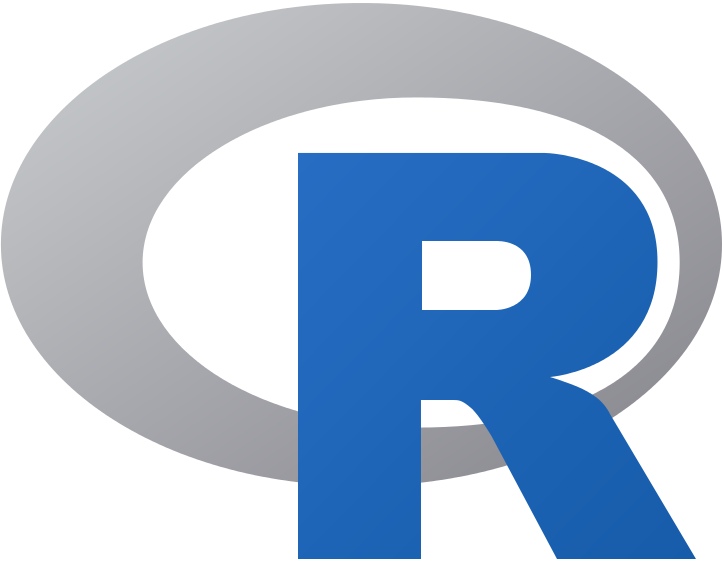

# Get R running in the background

In [1]:
%load_ext rpy2.ipython

# Then use R from within the notebook

In [2]:
%%R
print('hello,world')

[1] "hello,world"


In [5]:
%%R
# Create the data frame.
city.data <- data.frame(
   annual_t2m = c(15,9.8,10.01), 
   annual_prcp = c(1221,843,394),
   name = c("Durham","Chicago","Denver")
)

In [6]:
%%R
print(city.data)

  annual_t2m annual_prcp    name
1      15.00        1221  Durham
2       9.80         843 Chicago
3      10.01         394  Denver


# Example of using R: gstat

The use of gstat for the Geostatistics module is the reason that we will use R

In [15]:
%%R
#Import the sp package (Classes and methods for spatial data)
require(sp)
#library(gstat)

In [16]:
%%R
#The sp package brings the meuse dataframe along with it
print(meuse)


Error in print(meuse) : object 'meuse' not found


In [7]:
%%R
#Assign geographic coordinates information using the x,y values
sp:::coordinates(meuse) = ~x+y


Error in sp:::coordinates(meuse) = ~x + y : object 'meuse' not found


/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Error in sp:::coordinates(meuse) = ~x + y : object 'meuse' not found

  warnings.warn(x, RRuntimeWarning)


In [ ]:
%%R
#Make a bubble plot
sp::bubble(meuse, "zinc",col=c("#00ff0088", "#00ff0088"), main = "zinc concentrations (ppm)")

In [ ]:
#Basics of R
#Rpy2